In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px

# Load the datasets
economic_data = pd.read_csv('/kaggle/input/economic-china/ECONOMIC_Cn NEW.csv')
cities_data = pd.read_csv('/kaggle/input/economic-china/economic_cities_cn new.csv')


In [2]:
economic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10502 entries, 0 to 10501
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   10491 non-null  object
 1   Country Code   10475 non-null  object
 2   Series Name    10473 non-null  object
 3   Series Code    10445 non-null  object
 4   2000 [YR2000]  10486 non-null  object
 5   2001 [YR2001]  10484 non-null  object
 6   2002 [YR2002]  10483 non-null  object
 7   2003 [YR2003]  10437 non-null  object
 8   2004 [YR2004]  10439 non-null  object
 9   2005 [YR2005]  10480 non-null  object
 10  2006 [YR2006]  10437 non-null  object
 11  2007 [YR2007]  10477 non-null  object
 12  2008 [YR2008]  10474 non-null  object
 13  2009 [YR2009]  10464 non-null  object
 14  2010 [YR2010]  10464 non-null  object
 15  2011 [YR2011]  10452 non-null  object
 16  2012 [YR2012]  10436 non-null  object
 17  2013 [YR2013]  10436 non-null  object
 18  2014 [YR2014]  10434 non-n

In [3]:
economic_data.head()

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,19542982,19688632,21000256,22645130,23553551,24411191,25442944,25903301,26427199,27385307,28189672,29249157,30466479,31541209,32716210,33753499
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,14.438.030.241.194,742.516.834.396.313,644.932.147.797.304,754.101.896.480.183,393.317.768.847.308,357.650.800.354.462,413.967.803.534.352,179.319.572.747.206,200.233.326.232.255,356.128.837.446.668,289.490.410.370.988,368.950.830.230.738,407.762.772.858.795,346.678.830.410.982,365.757.606.530.364,312.134.122.890.873
2,Afghanistan,AFG,Surface area (sq. km),AG.SRF.TOTL.K2,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860,652860
3,Afghanistan,AFG,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,..,..,..,..,..,33.7,..,..,..,38.3,..,..,..,..
4,Afghanistan,AFG,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,..,..,..,..,..,..,..,..,..,125.972.698.686.675,147.568.473.996.675,159.667.420.738.305,196.823.624.473.502,214.701.228.563.706,212.344.236.662.249,206.386.411.982.215


In [4]:
# Check for missing values in the economic data
economic_data.isnull().sum()

Country Name     11
Country Code     27
Series Name      29
Series Code      57
2000 [YR2000]    16
2001 [YR2001]    18
2002 [YR2002]    19
2003 [YR2003]    65
2004 [YR2004]    63
2005 [YR2005]    22
2006 [YR2006]    65
2007 [YR2007]    25
2008 [YR2008]    28
2009 [YR2009]    38
2010 [YR2010]    38
2011 [YR2011]    50
2012 [YR2012]    66
2013 [YR2013]    66
2014 [YR2014]    68
2015 [YR2015]    30
dtype: int64

In [5]:
# Display unique Series Names in the economic data
unique_series_names = economic_data['Series Name'].unique()
print(unique_series_names)

['Population, total' 'Population growth (annual %)'
 'Surface area (sq. km)'
 'Poverty headcount ratio at national poverty lines (% of population)'
 'GNI, Atlas method (current US$)'
 'GNI per capita, Atlas method (current US$)'
 'GNI, PPP (current international $)'
 'GNI per capita, PPP (current international $)'
 'Income share held by lowest 20%'
 'Life expectancy at birth, total (years)'
 'Fertility rate, total (births per woman)'
 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
 'Contraceptive prevalence, any method (% of married women ages 15-49)'
 'Births attended by skilled health staff (% of total)'
 'Mortality rate, under-5 (per 1,000 live births)'
 'Prevalence of underweight, weight for age (% of children under 5)'
 'Immunization, measles (% of children ages 12-23 months)'
 'Primary completion rate, total (% of relevant age group)'
 'School enrollment, secondary (% gross)'
 'School enrollment, primary and secondary (gross), gender parity index (GPI)'
 'Prevale

**How has GDP evolved over the years for China?**

In [6]:
# Plot GDP evolution over the years for China
fig_gdp_evolution = px.line(economic_data[economic_data['Country Name'] == 'China'],
                             x='Series Name', y=economic_data.columns[4:],
                             title='GDP Evolution Over the Years for China')
fig_gdp_evolution.show()


**Explore the correlation between GDP and major economic sectors.**

In [7]:
# Extract data for GDP, Agriculture, Manufacturing, and Services sectors in China
gdp_sectors_data = economic_data[economic_data['Country Name'] == 'China']

# Plot correlation between GDP and major economic sectors
fig_correlation = px.scatter(gdp_sectors_data, x='Series Name', y=gdp_sectors_data.columns[4:],
                              title='Correlation Between GDP and Major Economic Sectors in China')
fig_correlation.show()


**Examine the trend in GDP for selected countries over the years.**

In [8]:
# Select a few countries for comparison
selected_countries = ['China', 'United States', 'India', 'Brazil']

# Extract data for selected countries
selected_countries_data = economic_data[economic_data['Country Name'].isin(selected_countries)]

# Plot trend in GDP for selected countries over the years
fig_gdp_comparison_countries = px.line(selected_countries_data, x='Series Name', y=selected_countries_data.columns[4:],
                                       color='Country Name',
                                       title='GDP Comparison Over the Years for Selected Countries')
fig_gdp_comparison_countries.show()


In [9]:
import pandas as pd
import numpy as np
import plotly.express as px

# Replace non-numeric values with NaN
economic_data_numeric = economic_data.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with appropriate numerical values (e.g., mean)
economic_data_numeric_filled = economic_data_numeric.fillna(economic_data_numeric.mean())

# Calculate and visualize the correlation between economic indicators in the main economic dataset
correlation_matrix = economic_data_numeric_filled.corr()

# Visualize the correlation matrix using plotly express heatmap
fig_correlation_heatmap = px.imshow(correlation_matrix, x=correlation_matrix.columns, y=correlation_matrix.columns, title='Correlation Between Economic Indicators')
fig_correlation_heatmap.show()


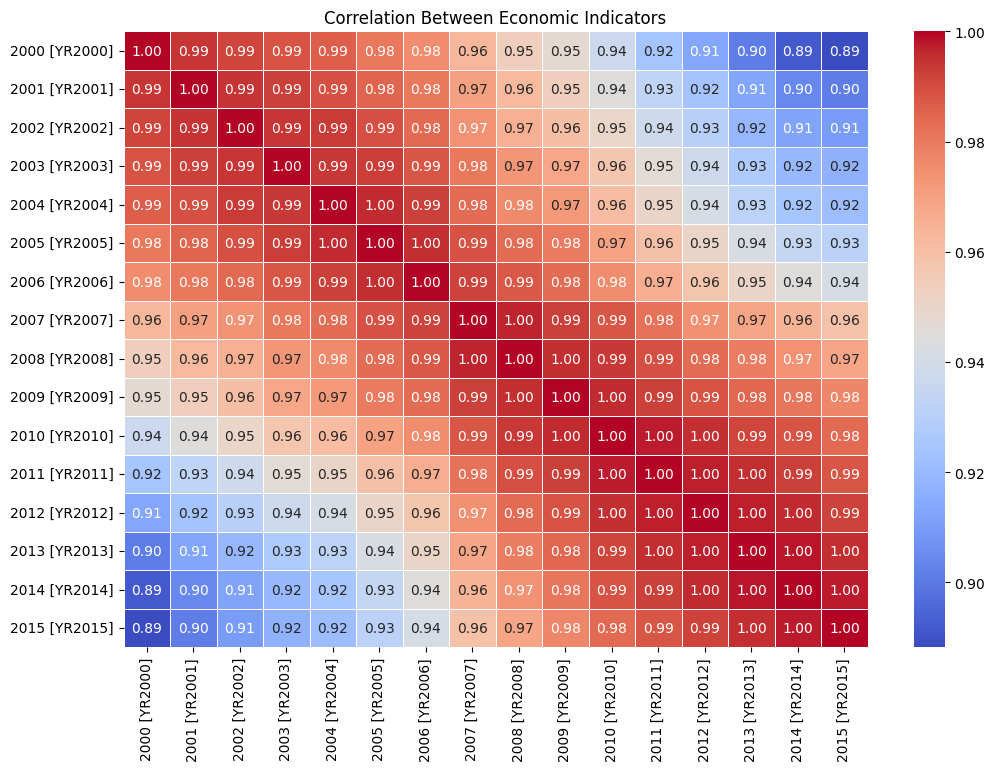

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap for the correlation matrix using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Between Economic Indicators')
plt.show()
